In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import seaborn as sns

# Importing and Reading data

In [3]:
with open('articles.json', 'r') as myfile:
    data=myfile.read()

In [4]:
data = json.loads(data)

In [5]:
df = pd.read_json('articles.json')
df

,body,title,category
0,Protecting Netflix Viewing Privacy at Scale\r\...,Protecting Netflix Viewing Privacy at Scale,Engineering
1,Introducing Winston — Event driven Diagnostic ...,Introducing Winston - Event driven Diagnostic ...,Engineering
2,Performance & Usage at Instagram\r\n\r\nAt Ins...,Performance & Usage at Instagram,Engineering
3,The simple example of calculating and formatti...,Refactoring a javascript video store,Engineering
4,Billing applications have transactions that ne...,Netflix Billing Migration to AWS - Part III,Engineering
...,...,...,...
2476,"At the Early Stage, Focus on Unit Economic Pro...","At the Early Stage, Focus on Unit Economic Pro...",Startups & Business
2477,5 Tips to Nail a Successful Product Launch\n\n...,5 Tips to Nail a Successful Product Launch,Startups & Business
2478,Routes to Defensibility for your AI Startup\n\...,Routes to Defensibility for your AI Startup,Engineering
2479,Faster. Faster. Faster.\r\n\r\nI’d like to tal...,Faster. Faster. Faster.,Product & Design


In [6]:
df.shape

(2481, 3)

In [7]:
df['category'].unique()

array(['Engineering', 'Startups & Business', 'Product & Design'],
      dtype=object)

In [8]:
# Check null 
df.isnull().sum()

body        0
title       0
category    0
dtype: int64

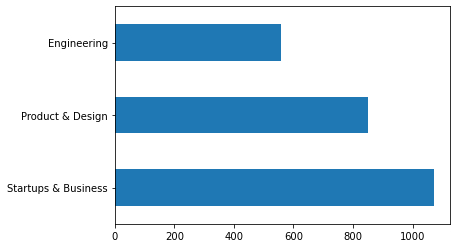

In [9]:
df['category'].value_counts().plot(kind='barh')
plt.show()

In [10]:
#import data
#exploring data
#transformin data into information:

#remove stop words
#check the most common words
#tokenization

#Vectorization

# Model Selection

## Tokenization

In [11]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
df["title"]=df["title"].str.lower() 
df["body"]=df["body"].str.lower() 
df.head()

,body,title,category
0,protecting netflix viewing privacy at scale\r\...,protecting netflix viewing privacy at scale,Engineering
1,introducing winston — event driven diagnostic ...,introducing winston - event driven diagnostic ...,Engineering
2,performance & usage at instagram\r\n\r\nat ins...,performance & usage at instagram,Engineering
3,the simple example of calculating and formatti...,refactoring a javascript video store,Engineering
4,billing applications have transactions that ne...,netflix billing migration to aws - part iii,Engineering


In [13]:
#tokenization of words
df['body'] = df.apply(lambda row: word_tokenize(row['body']), axis=1) 
df.head()

,body,title,category
0,"[protecting, netflix, viewing, privacy, at, sc...",protecting netflix viewing privacy at scale,Engineering
1,"[introducing, winston, —, event, driven, diagn...",introducing winston - event driven diagnostic ...,Engineering
2,"[performance, &, usage, at, instagram, at, ins...",performance & usage at instagram,Engineering
3,"[the, simple, example, of, calculating, and, f...",refactoring a javascript video store,Engineering
4,"[billing, applications, have, transactions, th...",netflix billing migration to aws - part iii,Engineering


In [14]:
#only alphanumerical values
df['body'] = df['body'].apply(lambda x: [item for item in x if item.isalpha()]) 

In [15]:
#lemmatazing words
df['body'] = df['body'].apply(lambda x : [WordNetLemmatizer().lemmatize(y) for y in x])

In [16]:
#removing stopwords
stop = stopwords.words('english')
df['body'] =df['body'].apply(lambda x: [item for item in x if item not in stop])
df.head()

,body,title,category
0,"[protecting, netflix, viewing, privacy, scale,...",protecting netflix viewing privacy at scale,Engineering
1,"[introducing, winston, event, driven, diagnost...",introducing winston - event driven diagnostic ...,Engineering
2,"[performance, usage, instagram, instagram, tre...",performance & usage at instagram,Engineering
3,"[simple, example, calculating, formatting, bil...",refactoring a javascript video store,Engineering
4,"[billing, application, transaction, acid, comp...",netflix billing migration to aws - part iii,Engineering


### Printing the most common data in every label

In [17]:
from collections import Counter
all_words = [word for tokens in df[df['category']=='Engineering']['body'] for word in tokens]
counter = Counter(all_words)
counter.most_common(25)

[('data', 5653),
 ('time', 2899),
 ('code', 2797),
 ('system', 2766),
 ('service', 2471),
 ('user', 2410),
 ('application', 2407),
 ('function', 2058),
 ('example', 1924),
 ('model', 1886),
 ('database', 1752),
 ('team', 1694),
 ('server', 1612),
 ('change', 1529),
 ('network', 1424),
 ('test', 1346),
 ('component', 1341),
 ('result', 1326),
 ('learning', 1305),
 ('request', 1298),
 ('process', 1296),
 ('feature', 1273),
 ('value', 1220),
 ('set', 1157),
 ('run', 1107)]

In [18]:
all_words= [word for tokens in df[df['category']=='Startups & Business']['body'] for word in tokens]
counter = Counter(all_words)
counter.most_common(25)

[('company', 9867),
 ('product', 7080),
 ('people', 6938),
 ('team', 6425),
 ('customer', 6013),
 ('time', 5811),
 ('business', 4350),
 ('startup', 4336),
 ('user', 2945),
 ('help', 2548),
 ('email', 2540),
 ('growth', 2473),
 ('founder', 2426),
 ('value', 2336),
 ('sale', 2310),
 ('marketing', 2271),
 ('investor', 2258),
 ('question', 2163),
 ('idea', 2128),
 ('market', 2114),
 ('process', 2107),
 ('day', 2060),
 ('example', 2012),
 ('data', 2012),
 ('start', 2008)]

In [19]:
all_words= [word for tokens in df[df['category']=='Product & Design']['body'] for word in tokens]
counter = Counter(all_words)
counter.most_common(25)

[('product', 11829),
 ('user', 6311),
 ('design', 4939),
 ('team', 4537),
 ('customer', 4435),
 ('people', 3578),
 ('time', 3200),
 ('company', 2730),
 ('feature', 2127),
 ('experience', 2103),
 ('designer', 1880),
 ('help', 1831),
 ('manager', 1787),
 ('process', 1717),
 ('business', 1581),
 ('idea', 1495),
 ('data', 1468),
 ('build', 1452),
 ('example', 1422),
 ('value', 1399),
 ('question', 1286),
 ('lot', 1235),
 ('feedback', 1235),
 ('project', 1224),
 ('app', 1214)]

## Divide dataset to train,validate, test

In [20]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [21]:
train.shape

(1488, 3)

In [22]:
validate.shape

(496, 3)

In [23]:
test.shape

(497, 3)

In [24]:
df = pd.concat([train, validate])

# Feature Extraction 

In [25]:
word_vectorizer_uni = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    max_features =7000)

In [26]:
unigramdataGet= word_vectorizer_uni.fit_transform(df['body'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer_uni.get_feature_names()
unigramdata=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata[unigramdata>0] = 1

In [27]:
X=unigramdata
y=df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [28]:
selector = SelectKBest(chi2, k=700)
selector.fit(unigramdata, df['category'])

unigramdata = selector.transform(unigramdata)

In [29]:
svc=LinearSVC(C=1, max_iter=500)
svc= svc.fit(X_train , y_train)

y_pred = svc.predict(X_test)
dm=svc.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.87


C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
